## The fisrt part of this code was written by Hen hajaj.
## At the middle of this Notebook you can see our comment mentioning that from this part forward this is our code.

### Gal Giller - 209264555
### Yuval Bar - 206011355
### David Rapaport - 314659689

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


The Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.
https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv

In [3]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [4]:
data.head()

age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4          93.444          -36.1      4.963       5228.1  0  
1         -0.1          93.200          -42.0      4.021       5195.8  0  
2         -1.7          94.055          -39.8      0.729       4991.6  1  
3         -1.8          93.075          -47.1      1.405       5099.1  0  
4         -2.9          92.201          -31.4      0.869       5076.2  1  

[5 rows x 21 columns]

# Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

# Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [5]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [6]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [7]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

# Data exploration

In [8]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

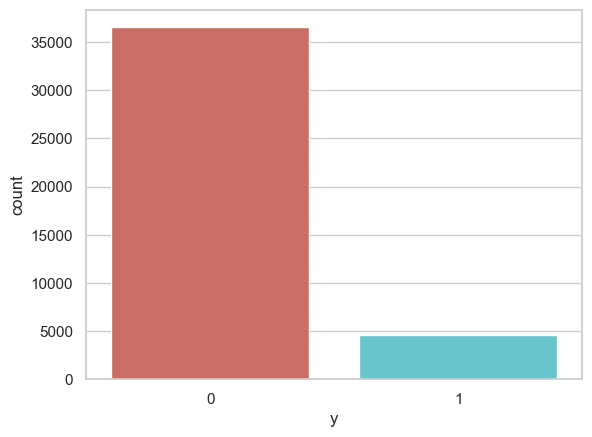

In [9]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [10]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [11]:
data.groupby('y').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
y                                                                        
0  39.911185  220.844807  2.633085  984.113878  0.132374      0.248875   
1  40.913147  553.191164  2.051724  792.035560  0.492672     -1.233448   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
y                                                         
0       93.603757     -40.593097   3.811491  5176.166600  
1       93.354386     -39.789784   2.123135  5095.115991

Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.


In [12]:
data.groupby('job').mean()

age    duration  campaign       pdays  previous  \
job                                                                    
admin.         38.187296  254.312128  2.623489  954.319229  0.189023   
blue-collar    39.555760  264.542360  2.558461  985.160363  0.122542   
entrepreneur   41.723214  263.267857  2.535714  981.267170  0.138736   
housemaid      45.500000  250.454717  2.639623  960.579245  0.137736   
management     42.362859  257.058140  2.476060  962.647059  0.185021   
retired        62.027326  273.712209  2.476744  897.936047  0.327326   
self-employed  39.949331  264.142153  2.660802  976.621393  0.143561   
services       37.926430  258.398085  2.587805  979.974049  0.154951   
student        25.894857  283.683429  2.104000  840.217143  0.524571   
technician     38.507638  250.232241  2.577339  964.408127  0.153789   
unemployed     39.733728  249.451677  2.564103  935.316568  0.199211   
unknown        45.563636  239.675758  2.648485  938.727273  0.154545   

               emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job                                                                     
admin.             0.015563       93.534054     -40.245433   3.550274   
blue-collar        0.248995       93.656656     -41.375816   3.771996   
entrepreneur       0.158723       93.605372     -41.283654   3.791120   
housemaid          0.433396       93.676576     -39.495283   4.009645   
management        -0.012688       93.522755     -40.489466   3.611316   
retired           -0.698314       93.430786     -38.573081   2.770066   
self-employed      0.094159       93.559982     -40.488107   3.689376   
services           0.175359       93.634659     -41.290048   3.699187   
student           -1.408000       93.331613     -40.187543   1.884224   
technician         0.274566       93.561471     -39.927569   3.820401   
unemployed        -0.111736       93.563781     -40.007594   3.466583   
unknown            0.357879       93.718942     -38.797879   3.949033   

               nr_employed         y  
job                                   
admin.         5164.125350  0.129726  
blue-collar    5175.615150  0.068943  
entrepreneur   5176.313530  0.085165  
housemaid      5179.529623  0.100000  
management     5166.650513  0.112175  
retired        5122.262151  0.252326  
self-employed  5170.674384  0.104856  
services       5171.600126  0.081381  
student        5085.939086  0.314286  
technician     5175.648391  0.108260  
unemployed     5157.156509  0.142012  
unknown        5172.931818  0.112121

In [13]:
data.groupby('marital').mean()

age    duration  campaign       pdays  previous  emp_var_rate  \
marital                                                                         
divorced  44.899393  253.790330   2.61340  968.639853  0.168690      0.163985   
married   42.307165  257.438623   2.57281  967.247673  0.155608      0.183625   
single    33.158714  261.524378   2.53380  949.909578  0.211359     -0.167989   
unknown   40.275000  312.725000   3.18750  937.100000  0.275000     -0.221250   

          cons_price_idx  cons_conf_idx  euribor3m  nr_employed         y  
marital                                                                    
divorced       93.606563     -40.707069   3.715603  5170.878643  0.103209  
married        93.597367     -40.270659   3.745832  5171.848772  0.101573  
single         93.517300     -40.918698   3.317447  5155.199265  0.140041  
unknown        93.471250     -40.820000   3.313038  5157.393750  0.150000

In [14]:
data.groupby('education').mean()

age    duration  campaign       pdays  previous  \
education                                                                    
Basic                42.163910  263.043874  2.559498  974.877967  0.141053   
high.school          37.998213  260.886810  2.568576  964.358382  0.185917   
illiterate           48.500000  276.777778  2.277778  943.833333  0.111111   
professional.course  40.080107  252.533855  2.586115  960.765974  0.163075   
university.degree    38.879191  253.223373  2.563527  951.807692  0.192390   
unknown              43.481225  262.390526  2.596187  942.830734  0.226459   

                     emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
education                                                                     
Basic                    0.191329       93.639933     -40.927595   3.729654   
high.school              0.032937       93.584857     -40.940641   3.556157   
illiterate              -0.133333       93.317333     -39.950000   3.516556   
professional.course      0.173012       93.569864     -40.124108   3.710457   
university.degree       -0.028090       93.493466     -39.975805   3.529663   
unknown                  0.059099       93.658615     -39.877816   3.571098   

                     nr_employed         y  
education                                   
Basic                5172.014113  0.087029  
high.school          5164.994735  0.108355  
illiterate           5171.777778  0.222222  
professional.course  5170.155979  0.113485  
university.degree    5163.226298  0.137245  
unknown              5159.549509  0.145003

# Visualizations

Text(0, 0.5, 'Frequency of Purchase')

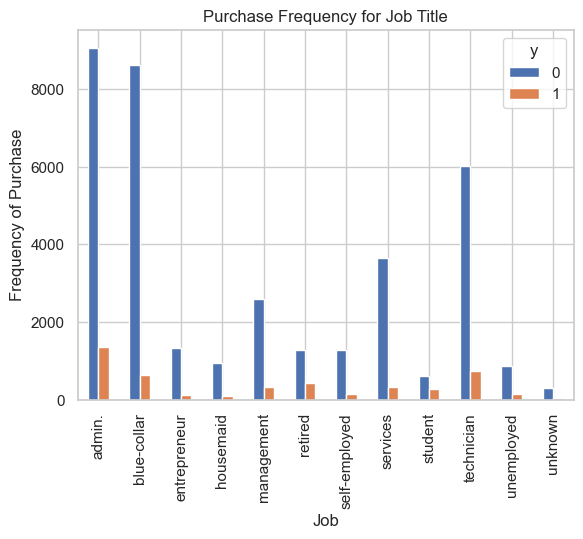

In [15]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

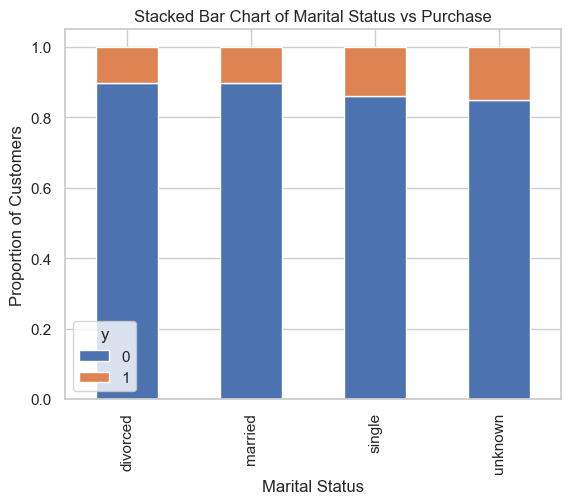

In [16]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

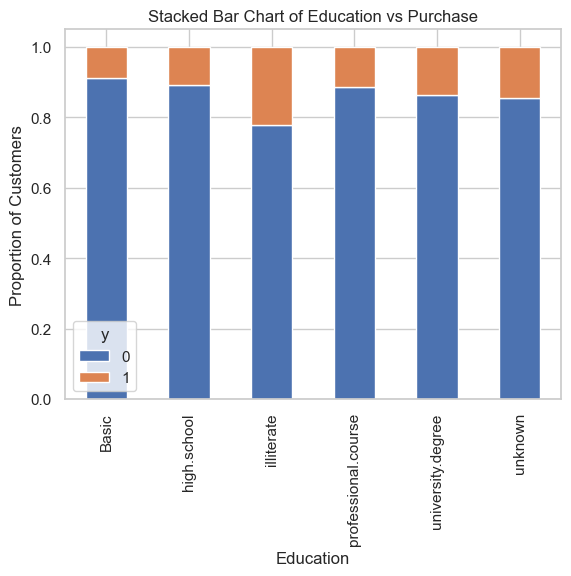

In [17]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

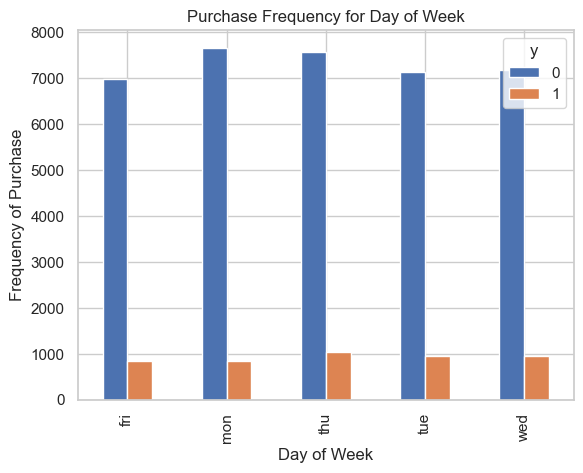

In [18]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

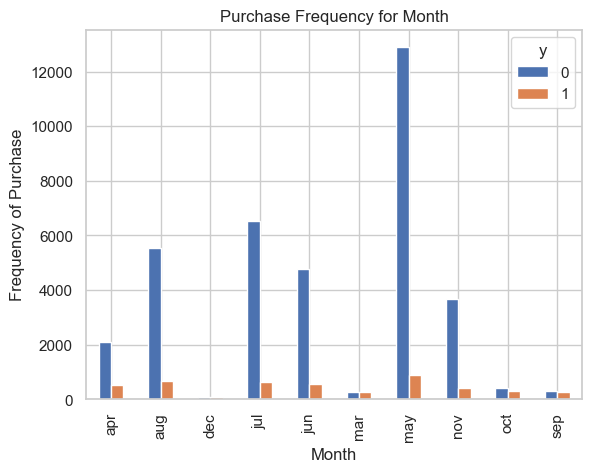

In [19]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency')

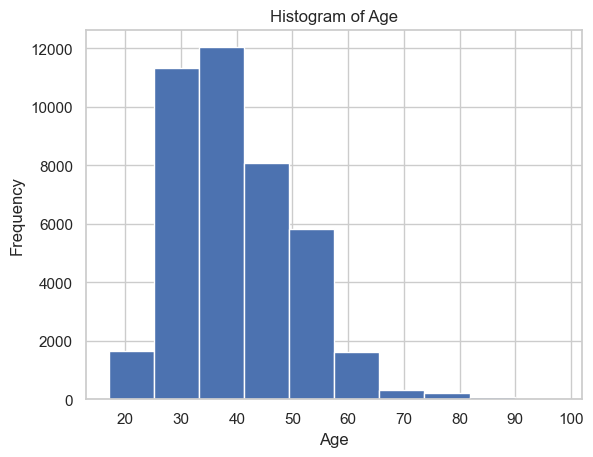

In [20]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [21]:
## convert categorical variables to dummy variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data.drop(cat_vars, axis=1, inplace=True)
data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [22]:
## SMOTE
from imblearn.over_sampling import SMOTE
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
columns = X.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


length of oversampled data is  73096
Number of no subscription in oversampled data 36548
Number of subscription 36548
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


# From here it is our Code

In [23]:
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score,KFold, cross_val_predict, GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier


## Correlation Coefficient 

<AxesSubplot:>

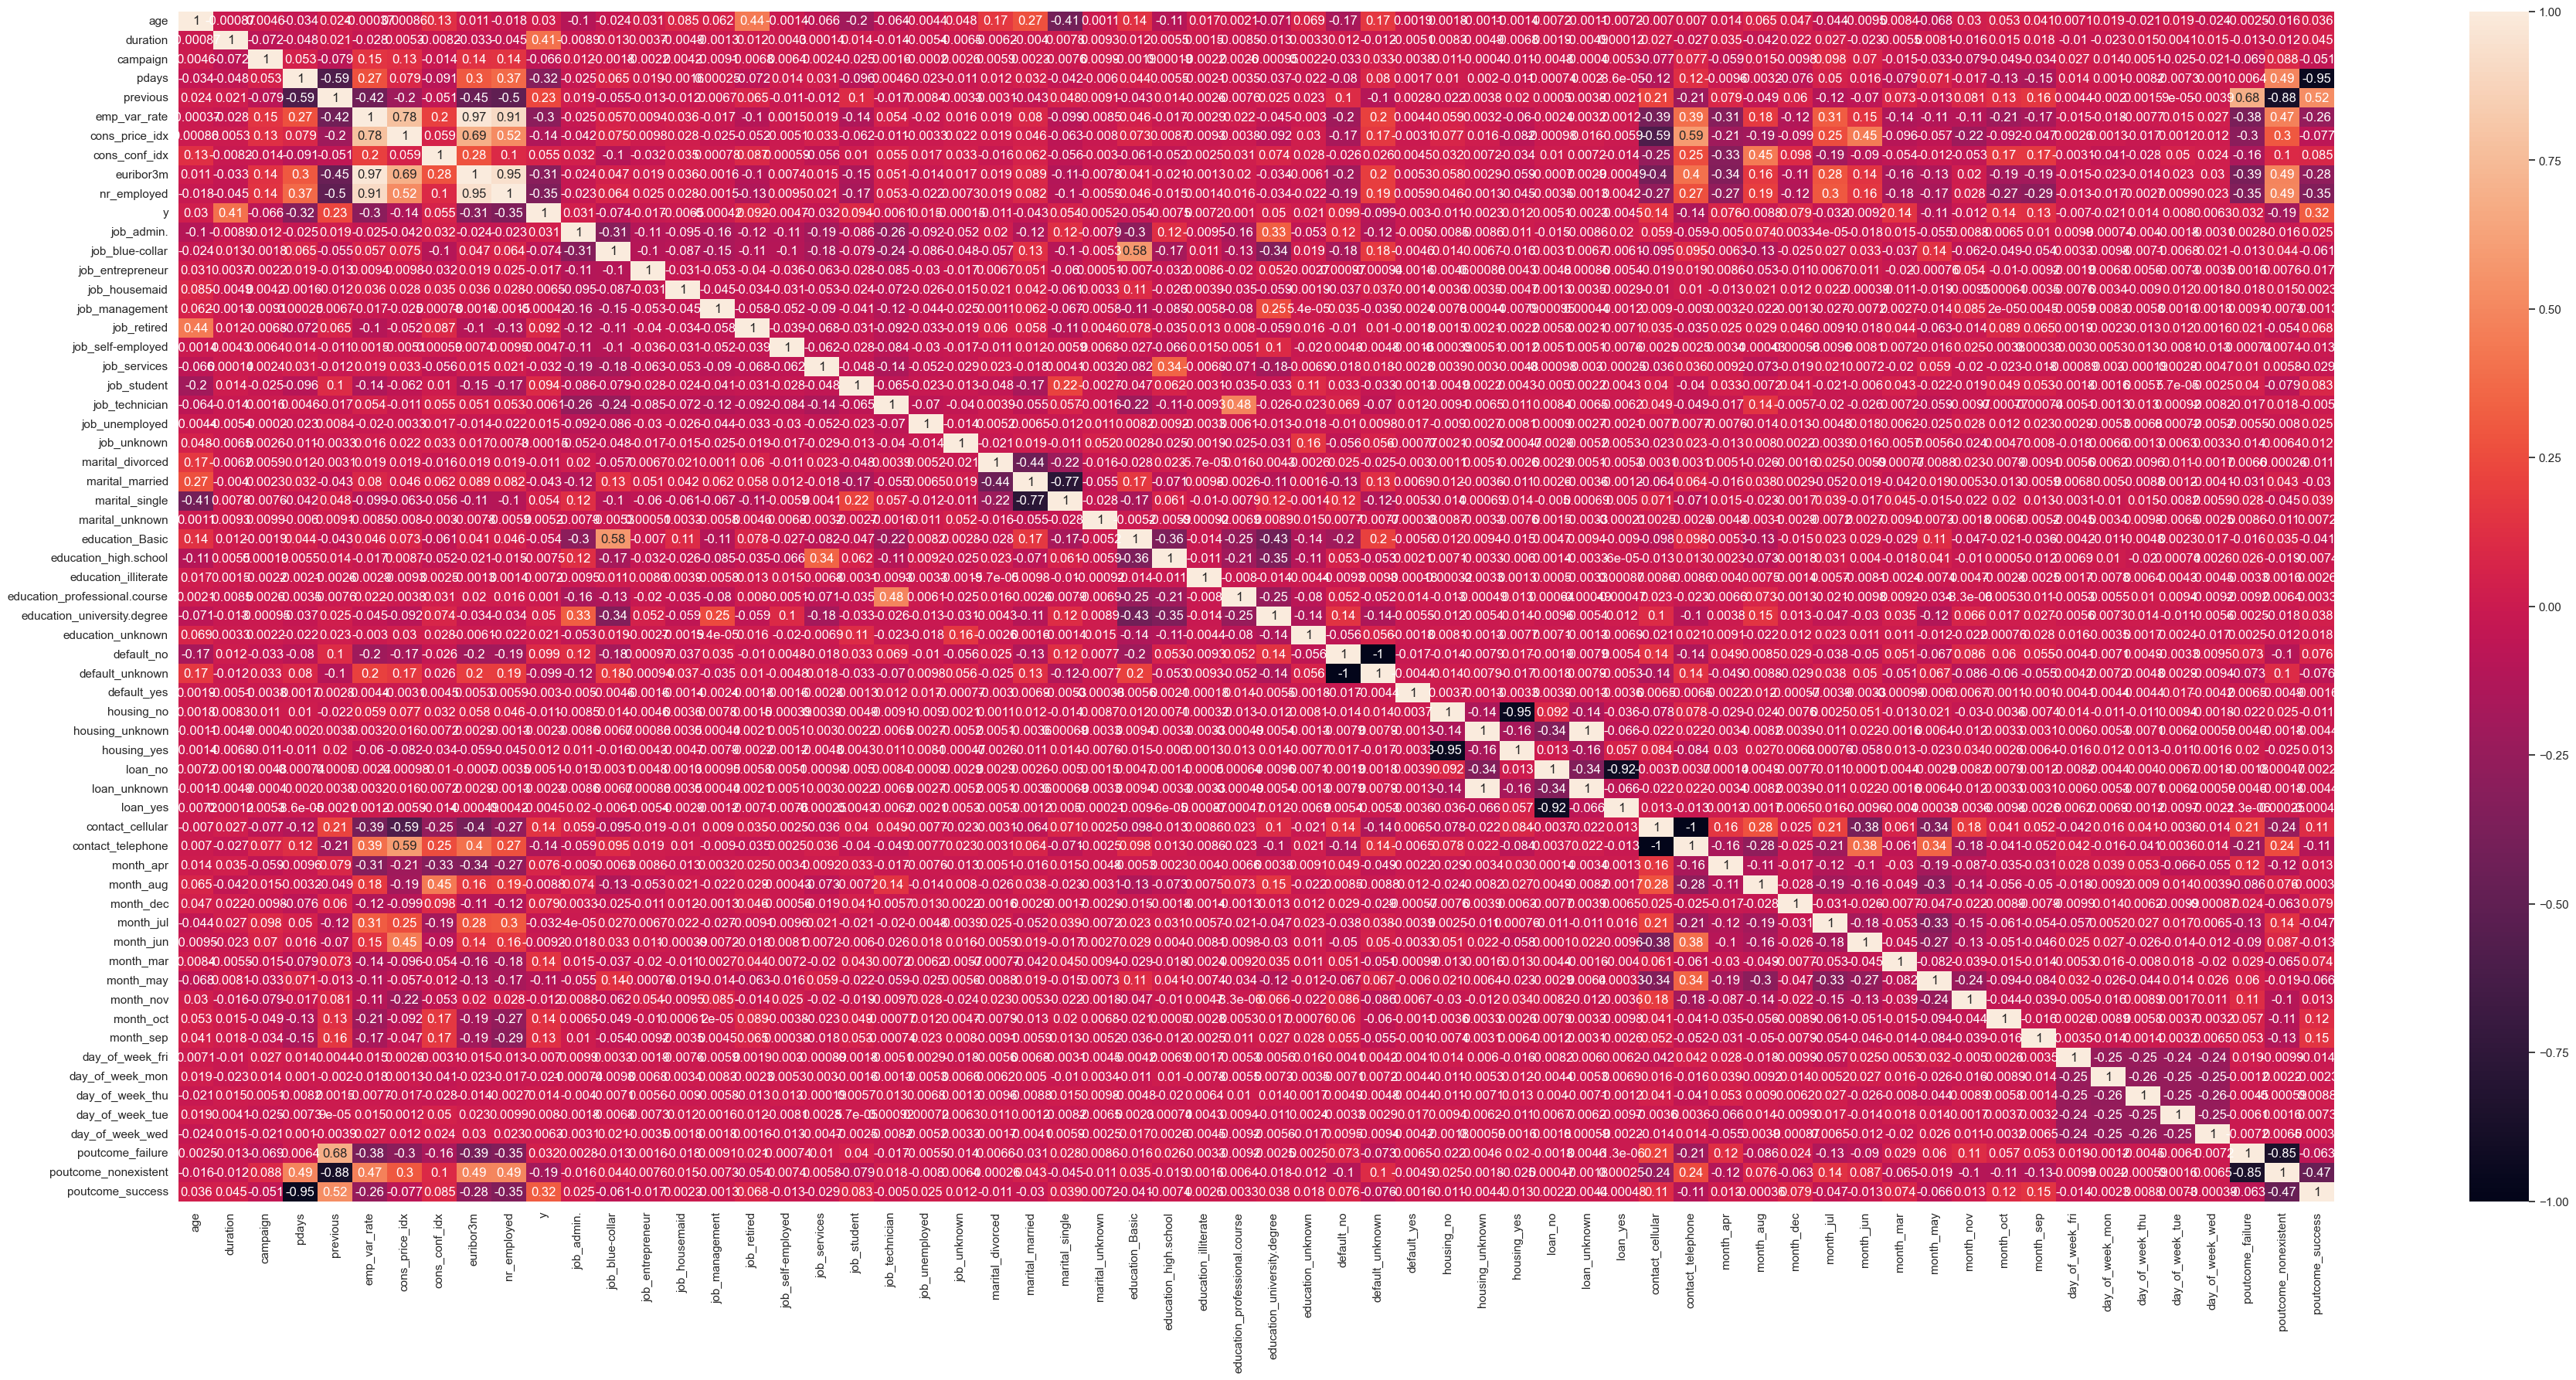

In [24]:
# Correlation Coefficient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor = data.corr()
plt.figure(figsize = (45,20))
sns.heatmap(cor,annot = True)

#### we can see that the previous variable has strong correlation to several different variables.
#### We decided to drop this variables so it will not influence our model.

In [25]:
data1 = data
data1 = data1.drop(columns='default_no') #we dropped it since it has -1 correlation with defult_unknow and higher corellations to more attributes then defult_unknow
data1 = data1.drop(columns='housing_no') #we dropped it since it has -1 correlation with housing_yes and higher corellations to more attributes then housing_yes
data1 = data1.drop(columns='pdays') #we dropped it since it has -1 correlation with putcome_success and higher corellations to more attributes then putcome_success
data1 = data1.drop(columns='marital_single') #we dropped it since it has -1 correlation with material_married and higher corellations to more attributes then material_married
data1 = data1.drop(columns='previous') #we dropped it since it has -1 correlation with potcome_nonexistent and higher corellations to more attributes then potcome_nonexistent
data1 = data1.drop(columns='loan_no') #we dropped it since it has -1 correlation with loan_yes and higher corellations to more attributes then loan_yes
data1 = data1.drop(columns='contact_cellular') #we dropped it since it has -1 correlation with contact_telephone and higher corellations to more attributes then contact_telephone

data1


age  duration  campaign  emp_var_rate  cons_price_idx  cons_conf_idx  \
0       44       210         1           1.4          93.444          -36.1   
1       53       138         1          -0.1          93.200          -42.0   
2       28       339         3          -1.7          94.055          -39.8   
3       39       185         2          -1.8          93.075          -47.1   
4       55       137         1          -2.9          92.201          -31.4   
...    ...       ...       ...           ...             ...            ...   
41183   59       222         1           1.4          94.465          -41.8   
41184   31       196         2           1.1          93.994          -36.4   
41185   42        62         3           1.1          93.994          -36.4   
41186   48       200         2          -3.4          92.431          -26.9   
41187   25       112         4           1.1          93.994          -36.4   

       euribor3m  nr_employed  y  job_admin.  ...  month_oct  month_sep  \
0          4.963       5228.1  0           0  ...          0          0   
1          4.021       5195.8  0           0  ...          0          0   
2          0.729       4991.6  1           0  ...          0          0   
3          1.405       5099.1  0           0  ...          0          0   
4          0.869       5076.2  1           0  ...          0          0   
...          ...          ... ..         ...  ...        ...        ...   
41183      4.866       5228.1  0           0  ...          0          0   
41184      4.860       5191.0  0           0  ...          0          0   
41185      4.857       5191.0  0           1  ...          0          0   
41186      0.742       5017.5  0           0  ...          1          0   
41187      4.859       5191.0  0           0  ...          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0                    0                0                1                0   
1                    1                0                0                0   
2                    0                0                1                0   
3                    1                0                0                0   
4                    1                0                0                0   
...                ...              ...              ...              ...   
41183                0                0                1                0   
41184                0                0                1                0   
41185                0                0                0                0   
41186                0                0                0                1   
41187                1                0                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
0                    0                 0                     1   
1                    0                 0                     1   
2                    0                 0                     0   
3                    0                 0                     1   
4                    0                 0                     0   
...                ...               ...                   ...   
41183                0                 0                     1   
41184                0                 0                     1   
41185                1                 0                     1   
41186                0                 0                     1   
41187                0                 0                     1   

       poutcome_success  
0                     0  
1                     0  
2                     1  
3                     0  
4                     1  
...                 ...  
41183                 0  
41184                 0  
41185                 0  
41186                 0  
41187                 0  

[41188 rows x 55 columns]

<AxesSubplot:>

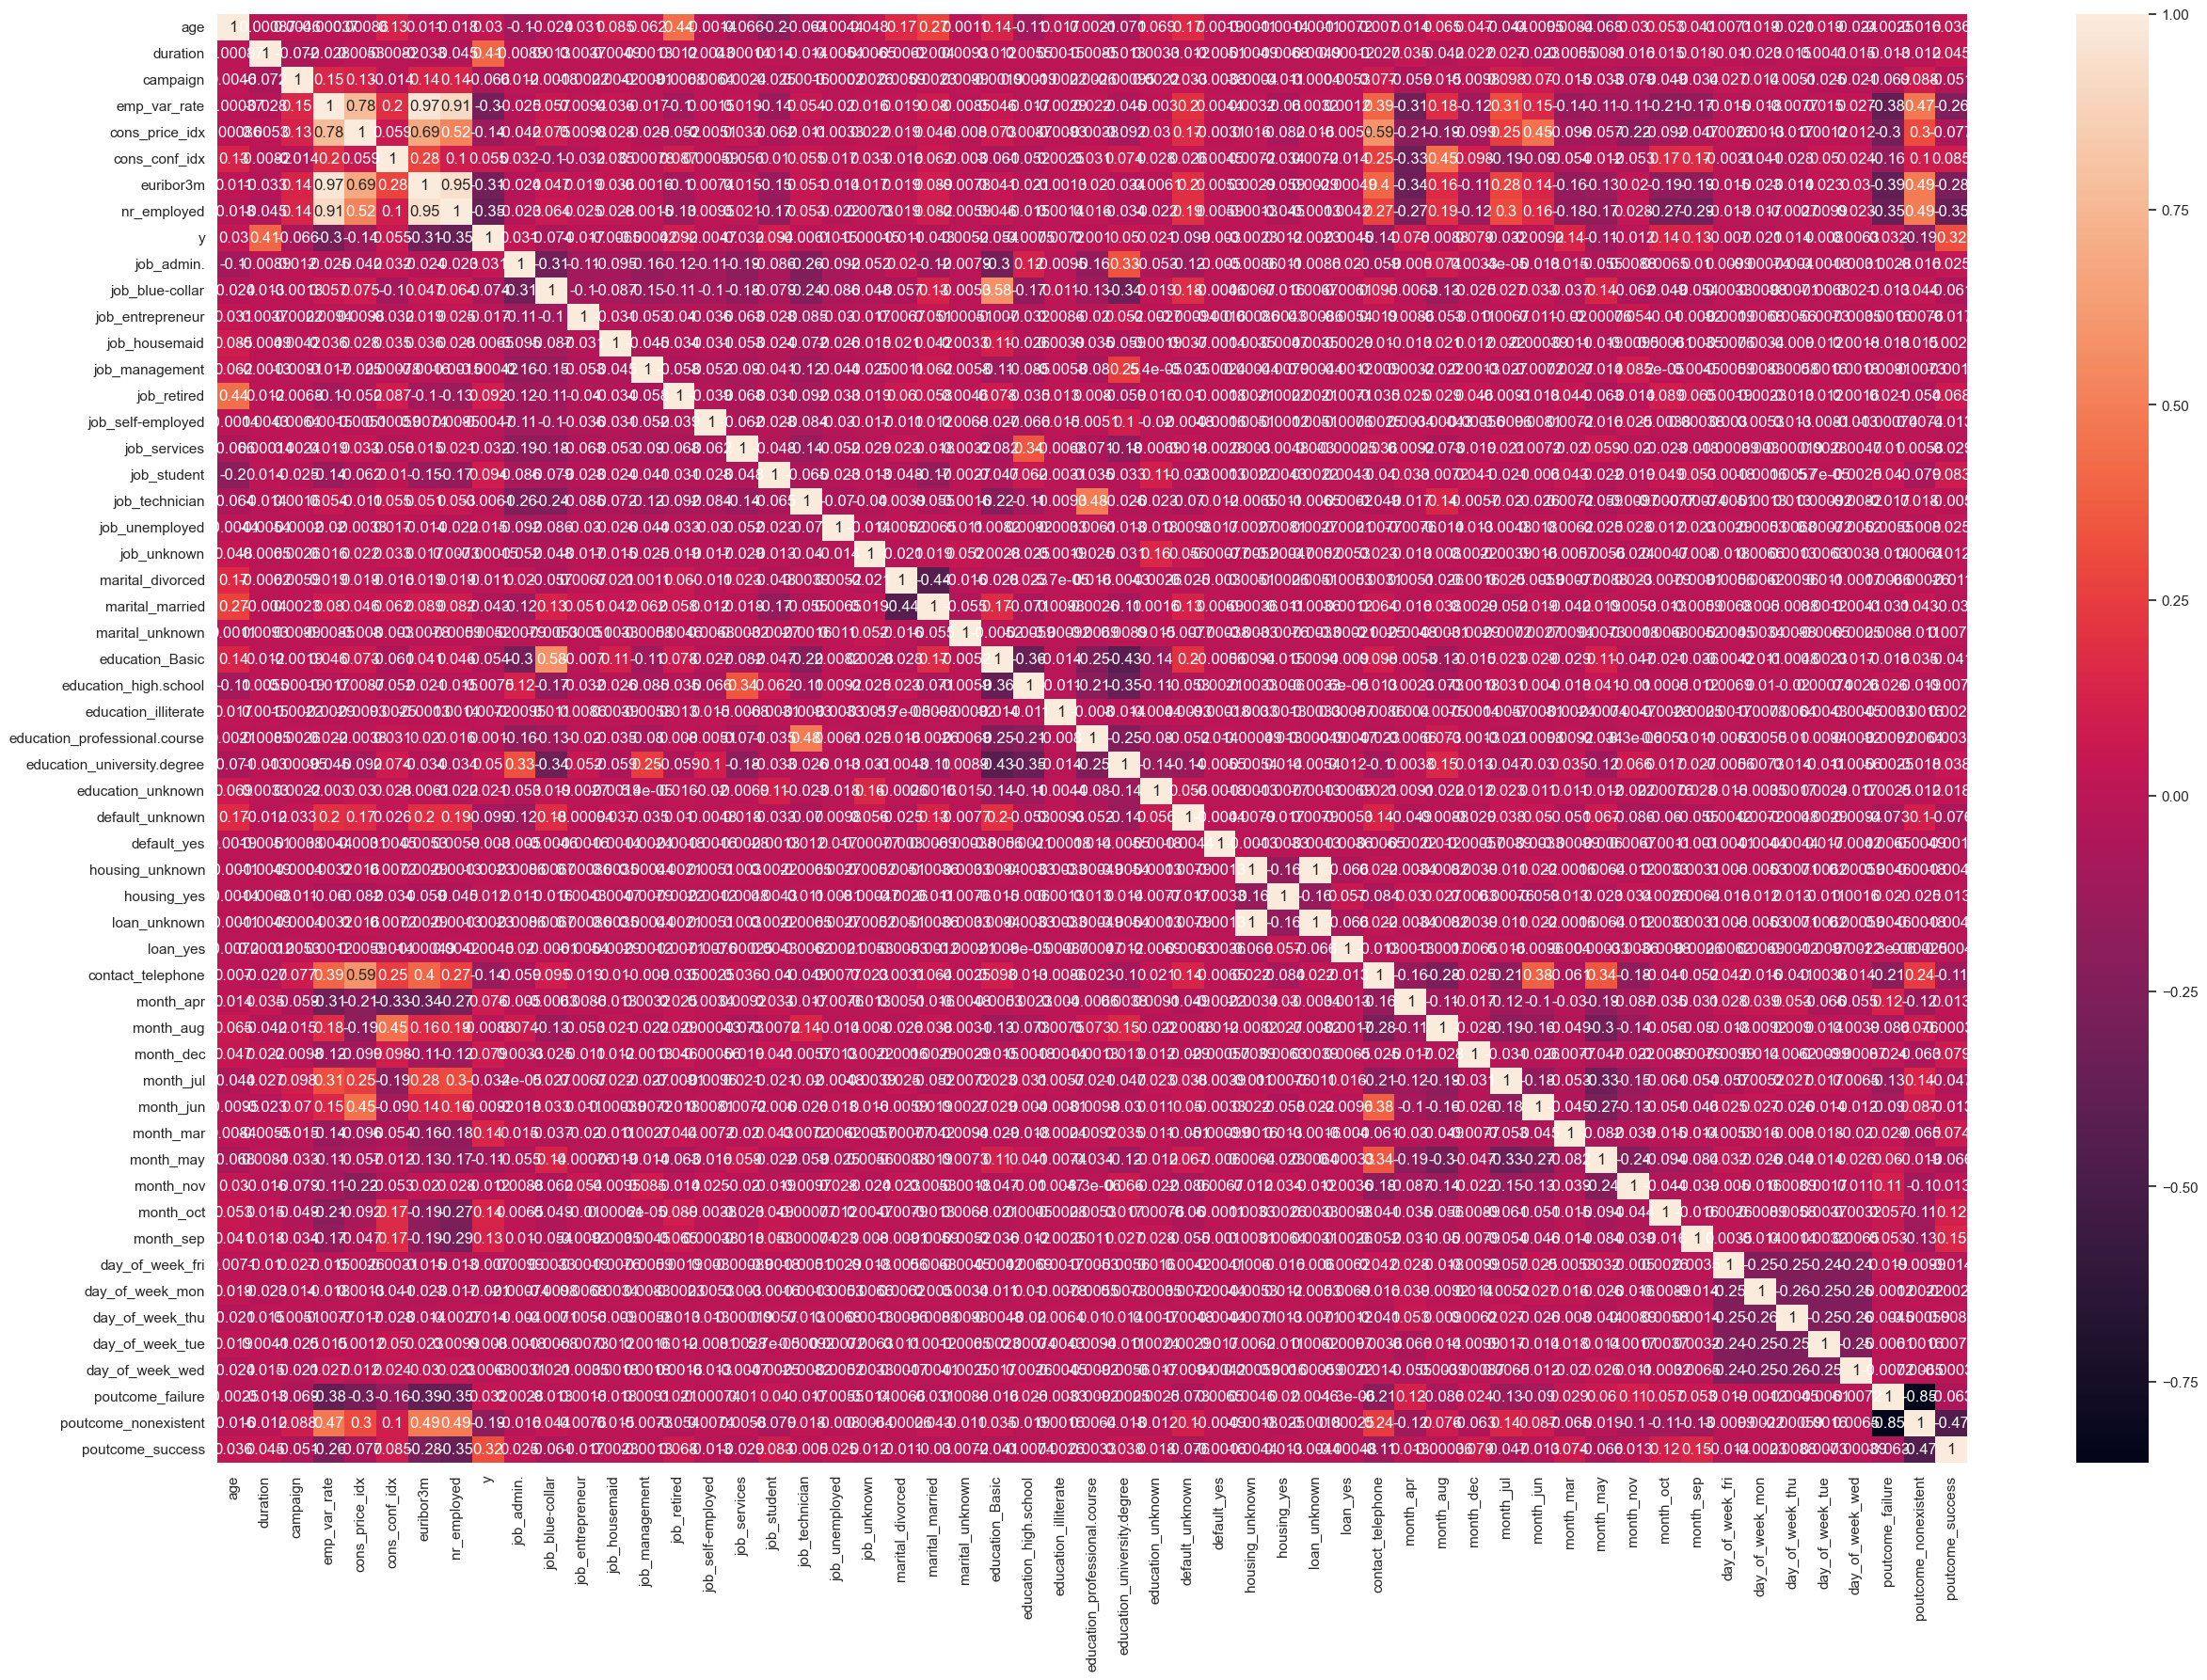

In [26]:
# Correlation Coefficient
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
cor = data1.corr()
plt.figure(figsize = (30,20))
sns.heatmap(cor,annot = True)

In [27]:
data1.info

<bound method DataFrame.info of        age  duration  campaign  emp_var_rate  cons_price_idx  cons_conf_idx  \
0       44       210         1           1.4          93.444          -36.1   
1       53       138         1          -0.1          93.200          -42.0   
2       28       339         3          -1.7          94.055          -39.8   
3       39       185         2          -1.8          93.075          -47.1   
4       55       137         1          -2.9          92.201          -31.4   
...    ...       ...       ...           ...             ...            ...   
41183   59       222         1           1.4          94.465          -41.8   
41184   31       196         2           1.1          93.994          -36.4   
41185   42        62         3           1.1          93.994          -36.4   
41186   48       200         2          -3.4          92.431          -26.9   
41187   25       112         4           1.1          93.994          -36.4   

       euribor3m  n

### We printed the data attributes with different statistical measures 

In [28]:
data1.describe()

age      duration      campaign  emp_var_rate  cons_price_idx  \
count  41188.00000  41188.000000  41188.000000  41188.000000    41188.000000   
mean      40.02406    258.285010      2.567593      0.081886       93.575664   
std       10.42125    259.279249      2.770014      1.570960        0.578840   
min       17.00000      0.000000      1.000000     -3.400000       92.201000   
25%       32.00000    102.000000      1.000000     -1.800000       93.075000   
50%       38.00000    180.000000      2.000000      1.100000       93.749000   
75%       47.00000    319.000000      3.000000      1.400000       93.994000   
max       98.00000   4918.000000     56.000000      1.400000       94.767000   

       cons_conf_idx     euribor3m   nr_employed             y    job_admin.  \
count   41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      -40.502600      3.621291   5167.035911      0.112654      0.253035   
std         4.628198      1.734447     72.251528      0.316173      0.434756   
min       -50.800000      0.634000   4963.600000      0.000000      0.000000   
25%       -42.700000      1.344000   5099.100000      0.000000      0.000000   
50%       -41.800000      4.857000   5191.000000      0.000000      0.000000   
75%       -36.400000      4.961000   5228.100000      0.000000      1.000000   
max       -26.900000      5.045000   5228.100000      1.000000      1.000000   

       ...     month_oct     month_sep  day_of_week_fri  day_of_week_mon  \
count  ...  41188.000000  41188.000000     41188.000000     41188.000000   
mean   ...      0.017432      0.013839         0.190031         0.206711   
std    ...      0.130877      0.116824         0.392330         0.404951   
min    ...      0.000000      0.000000         0.000000         0.000000   
25%    ...      0.000000      0.000000         0.000000         0.000000   
50%    ...      0.000000      0.000000         0.000000         0.000000   
75%    ...      0.000000      0.000000         0.000000         0.000000   
max    ...      1.000000      1.000000         1.000000         1.000000   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
count     41188.000000     41188.000000     41188.000000      41188.000000   
mean          0.209357         0.196416         0.197485          0.103234   
std           0.406855         0.397292         0.398106          0.304268   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          0.000000   
75%           0.000000         0.000000         0.000000          0.000000   
max           1.000000         1.000000         1.000000          1.000000   

       poutcome_nonexistent  poutcome_success  
count          41188.000000      41188.000000  
mean               0.863431          0.033335  
std                0.343396          0.179512  
min                0.000000          0.000000  
25%                1.000000          0.000000  
50%                1.000000          0.000000  
75%                1.000000          0.000000  
max                1.000000          1.000000  

[8 rows x 55 columns]

## EDA 

#### analyzing the data set y=1 to summarize the main characteristics, using graphs and data visualization

In [29]:
data2 = data1
data2 = data2.loc[data2["y"] == 1]
data2

age  duration  campaign  emp_var_rate  cons_price_idx  cons_conf_idx  \
2       28       339         3          -1.7          94.055          -39.8   
4       55       137         1          -2.9          92.201          -31.4   
8       36       174         1          -2.9          92.963          -40.8   
12      55       372         3           1.4          93.444          -36.1   
16      35      1034         2          -1.8          93.075          -47.1   
...    ...       ...       ...           ...             ...            ...   
41125   40       365         4          -1.8          92.893          -46.2   
41129   55       585         2           1.4          94.465          -41.8   
41130   28      1111         5          -1.8          92.893          -46.2   
41172   27      1309         4           1.4          93.918          -42.7   
41178   35       243         1           1.4          93.444          -36.1   

       euribor3m  nr_employed  y  job_admin.  ...  month_oct  month_sep  \
2          0.729       4991.6  1           0  ...          0          0   
4          0.869       5076.2  1           0  ...          0          0   
8          1.266       5076.2  1           1  ...          0          0   
12         4.965       5228.1  1           0  ...          0          0   
16         1.365       5099.1  1           0  ...          0          0   
...          ...          ... ..         ...  ...        ...        ...   
41125      1.354       5099.1  1           1  ...          0          0   
41129      4.959       5228.1  1           0  ...          0          0   
41130      1.250       5099.1  1           0  ...          0          0   
41172      4.963       5228.1  1           0  ...          0          0   
41178      4.966       5228.1  1           0  ...          0          0   

       day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
2                    0                0                1                0   
4                    1                0                0                0   
8                    0                1                0                0   
12                   0                1                0                0   
16                   0                0                1                0   
...                ...              ...              ...              ...   
41125                0                1                0                0   
41129                1                0                0                0   
41130                1                0                0                0   
41172                0                0                0                0   
41178                1                0                0                0   

       day_of_week_wed  poutcome_failure  poutcome_nonexistent  \
2                    0                 0                     0   
4                    0                 0                     0   
8                    0                 0                     0   
12                   0                 0                     1   
16                   0                 0                     1   
...                ...               ...                   ...   
41125                0                 0                     1   
41129                0                 0                     1   
41130                0                 0                     1   
41172                1                 0                     1   
41178                0                 0                     1   

       poutcome_success  
2                     1  
4                     1  
8                     1  
12                    0  
16                    0  
...                 ...  
41125                 0  
41129                 0  
41130                 0  
41172                 0  
41178                 0  

[4640 rows x 55 columns]

### Week EDA

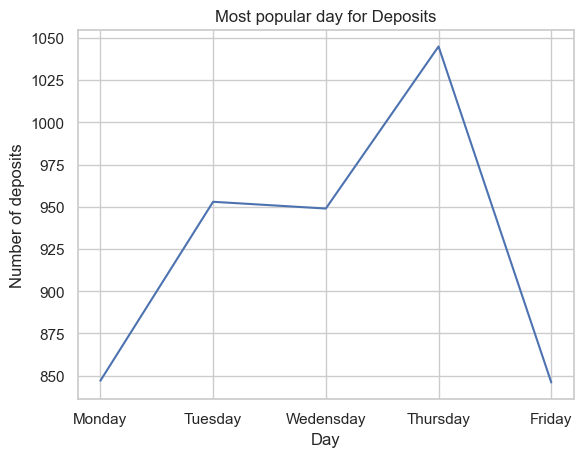

In [59]:
count_monday = len(data2[data2['day_of_week_mon']==1])
count_tuesday = len(data2[data2['day_of_week_tue']==1])
count_wedensday = len(data2[data2['day_of_week_wed']==1])
count_thursday = len(data2[data2['day_of_week_thu']==1])
count_friday = len(data2[data2['day_of_week_fri']==1])
x_axis = ['Monday','Tuesday','Wedensday','Thursday','Friday']
y_axis = [count_monday,count_tuesday,count_wedensday,count_thursday,count_friday]

%matplotlib inline
plt.plot(x_axis,y_axis)
plt.title('Most popular day for Deposits')
plt.xlabel('Day')
plt.ylabel('Number of deposits')
plt.show()

#### we can see from the upper plot that the most popular day for take a deposit is Thursday.
#### We can see a sharp decline between Thursday to Friday.
#### We can conclude that throughout the week starting Monday, there is a constant incline in deposits up until we reach the top most popular day which is Thursday

### Month EDA

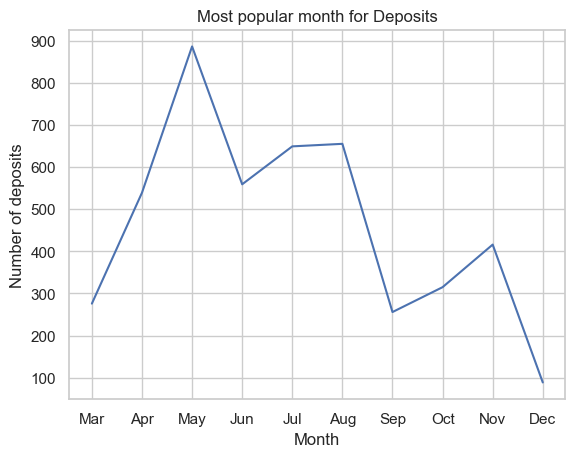

In [62]:
# month_jan = len(data[data['month_jan']==1])
# month_feb = len(data[data['month_feb']==1])
month_mar = len(data2[data2['month_mar']==1])
month_apr = len(data2[data2['month_apr']==1])
month_may = len(data2[data2['month_may']==1])
month_jun = len(data2[data2['month_jun']==1])
month_jul = len(data2[data2['month_jul']==1])
month_aug = len(data2[data2['month_aug']==1])
month_sep = len(data2[data2['month_sep']==1])
month_oct = len(data2[data2['month_oct']==1])
month_nov = len(data2[data2['month_nov']==1])
month_dec = len(data2[data2['month_dec']==1])

x_axis = ['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']##'Jan','Feb',
y_axis = [month_mar,month_apr,month_may,month_jun,month_jul
          ,month_aug,month_sep,month_oct,month_nov,month_dec]##month_jan,month_feb,

%matplotlib inline
plt.plot(x_axis,y_axis)
plt.title('Most popular month for Deposits')
plt.xlabel('Month')
plt.ylabel('Number of deposits')
plt.show()

#### We can see that the most popular month is May.
#### We assume that the reason is the Spring season - when a lot of families are taking a spring vacation and have time for araingments


### Age EDA

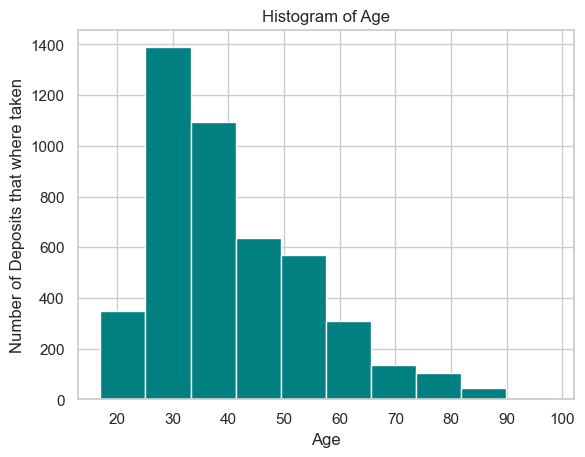

In [65]:
data2.age.hist(color='teal')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Deposits that where taken')
plt.show()

In [67]:
print(min(data['age']),max(data['age']))

17 98


#### We can see from the data that the most likely day to take a deposit is age 30.
#### The youngest age for taking a deposit is at age 17, and the max is 98

## All ML Methods

In [68]:
X = data1.loc[:, data1.columns != 'y']
y = data1.loc[:, data1.columns == 'y']
columns = X.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=0)


##Decission Tree Classifaier
pred_tree = DecisionTreeClassifier().fit(X_train, y_train).predict(X_test)

##Random Forest Classifaier
pred_forest = RandomForestClassifier().fit(X_train, y_train).predict(X_test).round()

##Logistic Reg Classifier
pred_clf = LogisticRegression().fit(X_train, y_train).predict(X_test)

##SVM
pred_SVM = SVC(kernel='linear').fit(X_train, y_train).predict(X_test)

##KNN
pred_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2).fit(X_train, y_train).predict(X_test)

##neural_network
pred_neural_network = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train).predict(X_test)

#Best ML Model
pred_list=[accuracy_score(y_test, pred_tree)
                    ,accuracy_score(y_test, pred_forest)
                    ,accuracy_score(y_test, pred_clf)
                    ,accuracy_score(y_test, pred_SVM)
                    ,accuracy_score(y_test, pred_KNN)
                    ,accuracy_score(y_test, pred_neural_network)]

pred_list_max = pred_list.index(max(pred_list))

if pred_list_max == 0:
    pred = pred_tree
    print('pred_tree')
elif pred_list_max == 1:
    pred = pred_forest
    print('pred_forest')
elif pred_list_max == 2:
    pred = pred_clf
    print('pred_clf')
elif pred_list_max == 3:
    pred = pred_SVM
    print('pred_SVM')
elif pred_list_max == 4:
    pred = pred_KNN
    print('pred_KNN')
else:
    pred = pred_neural_network
    print('pred_neural_network')
    
print(classification_report(y_test, pred))

/var/folders/08/l9rf3qcx30lgbbv325gq30dw0000gn/T/ipykernel_67985/3679339600.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  pred_forest = RandomForestClassifier().fit(X_train, y_train).predict(X_test).round()
/Users/yuvalba/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yuvalba/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

pred_forest
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10964
           1       0.96      0.95      0.95     10965

    accuracy                           0.95     21929
   macro avg       0.95      0.95      0.95     21929
weighted avg       0.95      0.95      0.95     21929



#### We can see from the results that the measures of the classification are high! 
#### It means we can use random forest model to predict if an exsiting customer will take a deposit or not
#### Now, we will take the customres that did took a deposite and start analize them to eancrease this results

## Statistic Anlysis

#### We will keep anly the y = 1 rows from the data so we can calculate different statictical data to focuse the right customers that have the highest probability to take a deposit

In [71]:
data2.describe()

age     duration     campaign  emp_var_rate  cons_price_idx  \
count  4640.000000  4640.000000  4640.000000   4640.000000     4640.000000   
mean     40.913147   553.191164     2.051724     -1.233448       93.354386   
std      13.837476   401.171871     1.666245      1.623626        0.676644   
min      17.000000    37.000000     1.000000     -3.400000       92.201000   
25%      31.000000   253.000000     1.000000     -1.800000       92.893000   
50%      37.000000   449.000000     2.000000     -1.800000       93.200000   
75%      50.000000   741.250000     2.000000     -0.100000       93.918000   
max      98.000000  4199.000000    23.000000      1.400000       94.767000   

       cons_conf_idx    euribor3m  nr_employed       y   job_admin.  ...  \
count    4640.000000  4640.000000  4640.000000  4640.0  4640.000000  ...   
mean      -39.789784     2.123135  5095.115991     1.0     0.291379  ...   
std         6.139668     1.742598    87.572641     0.0     0.454447  ...   
min       -50.800000     0.634000  4963.600000     1.0     0.000000  ...   
25%       -46.200000     0.849000  5017.500000     1.0     0.000000  ...   
50%       -40.400000     1.266000  5099.100000     1.0     0.000000  ...   
75%       -36.100000     4.406000  5191.000000     1.0     1.000000  ...   
max       -26.900000     5.045000  5228.100000     1.0     1.000000  ...   

         month_oct    month_sep  day_of_week_fri  day_of_week_mon  \
count  4640.000000  4640.000000      4640.000000      4640.000000   
mean      0.067888     0.055172         0.182328         0.182543   
std       0.251581     0.228341         0.386156         0.386333   
min       0.000000     0.000000         0.000000         0.000000   
25%       0.000000     0.000000         0.000000         0.000000   
50%       0.000000     0.000000         0.000000         0.000000   
75%       0.000000     0.000000         0.000000         0.000000   
max       1.000000     1.000000         1.000000         1.000000   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
count      4640.000000      4640.000000      4640.000000       4640.000000   
mean          0.225216         0.205388         0.204526          0.130388   
std           0.417769         0.404028         0.403398          0.336766   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         0.000000          0.000000   
75%           0.000000         0.000000         0.000000          0.000000   
max           1.000000         1.000000         1.000000          1.000000   

       poutcome_nonexistent  poutcome_success  
count           4640.000000       4640.000000  
mean               0.676940          0.192672  
std                0.467696          0.394440  
min                0.000000          0.000000  
25%                0.000000          0.000000  
50%                1.000000          0.000000  
75%                1.000000          0.000000  
max                1.000000          1.000000  

[8 rows x 55 columns]

#### We can see from the data that the avg age for the customers that are taking a deposit is 40.9, it is almost simillar to the median (50%) so we can say that the avg is not influenced from the extremum values